<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,46.079314,54.594420,105.693973,216.367707,79.770333,136.597374
1,0.0,1.0,49.859389,82.835115,64.378324,207.072829,159.212091,47.860738
2,0.0,2.0,98.265900,46.792142,-327.648101,-172.590058,3.100414,-175.690472
3,0.0,3.0,49.439991,44.576999,-86.821075,17.195916,46.757870,-29.561954
4,0.0,4.0,70.486841,72.729821,-522.108691,-368.892029,108.189929,-477.081959
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.450181,22.660387,57.480109,121.590678,50.664230,70.926448
59996,999.0,56.0,52.151736,70.064272,-51.637399,80.578609,179.352069,-98.773460
59997,999.0,57.0,79.379301,78.802270,-37.460261,130.721310,142.224157,-11.502847
59998,999.0,58.0,73.663744,55.040037,-629.966731,-491.262950,65.600761,-556.863711


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    46.079314  54.594420  105.693973  216.367707   79.770333   
      1.0    49.859389  82.835115   64.378324  207.072829  159.212091   
      2.0    98.265900  46.792142 -327.648101 -172.590058    3.100414   
      3.0    49.439991  44.576999  -86.821075   17.195916   46.757870   
      4.0    70.486841  72.729821 -522.108691 -368.892029  108.189929   
...                ...        ...         ...         ...         ...   
999.0 55.0   31.450181  22.660387   57.480109  121.590678   50.664230   
      56.0   52.151736  70.064272  -51.637399   80.578609  179.352069   
      57.0   79.379301  78.802270  -37.460261  130.721310  142.224157   
      58.0   73.663744  55.040037 -629.966731 -491.262950   65.600761   
      59.0   57.937166  22.311148 -142.333082  -52.084768  -19.522440   

                  e_hat  
rep   index              
0.0   0.0    136.597374  
      1.0     47.860738  
      2.0   -175.690472  
      3.0    -29.561954  
      4.0   -477.081959  
...                 ...  
999.0 55.0    70.926448  
      56.0   -98.773460  
      57.0   -11.502847  
      58.0  -556.863711  
      59.0   -32.562328  

[60000 rows x 6 columns]

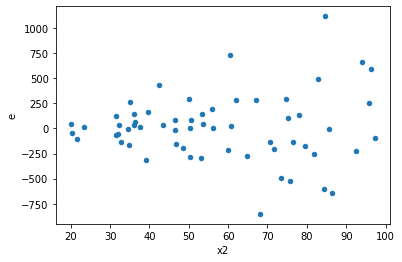

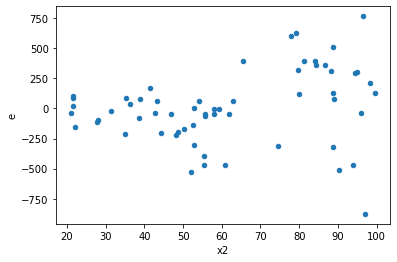

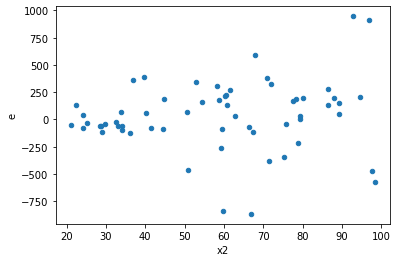

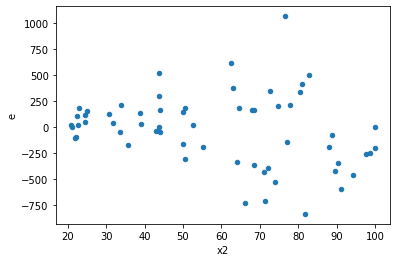

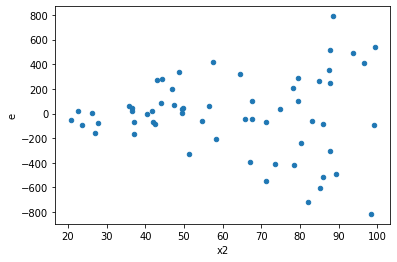

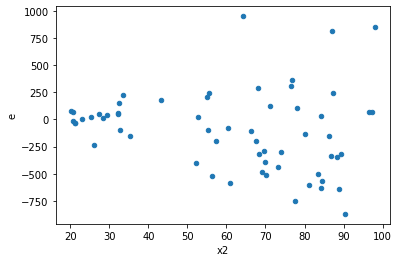

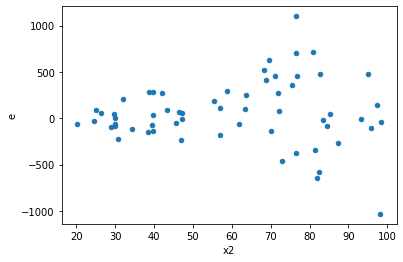

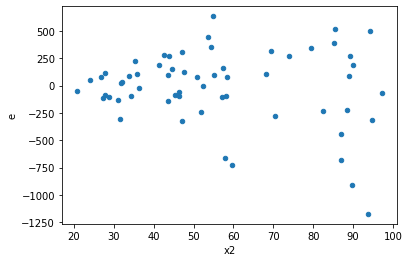

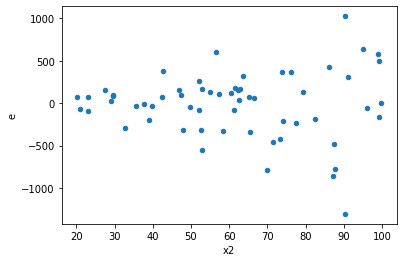

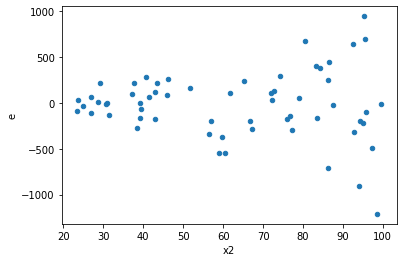

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,25.0,31.0,2350388.537538611,4741824.423436179,94015.54150154443,152962.0781753606,1.6269871526810047,0.1979582214932991,0.9010208892533504,0.09897911074664956,Reject005=1 : Homoscedasticity
5.0,28.0,28.0,1875639.733077435,3230475.2546156114,66987.1333241941,115374.11623627183,1.7223324914935798,0.1564538755424325,0.9217730622287837,0.07822693777121625,Reject005=1 : Homoscedasticity
9.0,35.0,21.0,1310917.4589481233,5878941.456242204,37454.78454137495,279949.59315439063,7.474334629936007,9.433777846235003e-06,0.9999952831110769,4.7168889231175015e-06,Reject005=0 : Heteroscedasticity
14.0,27.0,29.0,676041.9626594293,4904279.378267475,25038.591209608494,169113.0820092233,6.754097328939441,2.134048080693063e-06,0.9999989329759597,1.0670240403465314e-06,Reject005=0 : Heteroscedasticity
16.0,27.0,29.0,631445.326923118,5576893.323050648,23386.86396011548,192306.6663120913,8.22284965782739,2.3454153530444444e-07,0.9999998827292323,1.1727076765222222e-07,Reject005=0 : Heteroscedasticity
18.0,28.0,28.0,3685443.050752826,4647226.342186515,131622.96609831523,165972.36936380411,1.2609681599169535,0.5436045333539166,0.7281977333230417,0.2718022666769583,Reject005=1 : Homoscedasticity
19.0,27.0,29.0,906427.639899375,6737008.460501844,33571.394070347225,232310.6365690291,6.919898413578937,1.6354286622721759e-06,0.9999991822856689,8.177143311360879e-07,Reject005=0 : Heteroscedasticity
21.0,27.0,29.0,820913.1133305382,6564094.266521993,30404.189382612523,226348.0781559308,7.444634530706291,7.256707206249047e-07,0.9999996371646397,3.6283536031245234e-07,Reject005=0 : Heteroscedasticity
23.0,25.0,31.0,735847.4160037824,12051373.488539899,29433.896640151295,388753.98350128706,13.207696835184946,3.4570746265671914e-10,0.9999999998271463,1.7285373132835957e-10,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,27.0,3982516.8998063467,952216.252134258,137328.16895883955,35267.26859756511,0.25681015675768265,0.000522342424668794,Reject005=0 : Heteroscedasticity
1.0,25.0,31.0,2350388.537538611,4741824.423436179,94015.54150154443,152962.0781753606,1.6269871526810047,0.1979582214932991,Reject005=1 : Homoscedasticity
2.0,33.0,23.0,4362148.224042403,819255.9826161616,132186.30981946675,35619.82533113746,0.2694668258746702,0.0006263668837233075,Reject005=0 : Heteroscedasticity
3.0,24.0,32.0,2622941.2811678196,1808805.201970976,109289.22004865915,56525.162561593,0.5172071182905884,0.09842639725444631,Reject005=1 : Homoscedasticity
4.0,36.0,20.0,4883443.145652335,876453.7096362337,135651.19849034265,43822.685481811684,0.3230541710616109,0.003094539068729747,Reject005=0 : Heteroscedasticity
5.0,28.0,28.0,1875639.733077435,3230475.2546156114,66987.1333241941,115374.11623627183,1.7223324914935798,0.1564538755424325,Reject005=1 : Homoscedasticity
6.0,29.0,27.0,4855891.797954638,708187.9831587631,167444.54475705646,26229.18456143567,0.15664400771904108,3.9337965465488844e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,35.0,3658753.687604703,2557396.3083619694,174226.36607641442,73068.46595319912,0.41938810754482375,0.038535310303621194,Reject005=0 : Heteroscedasticity
8.0,35.0,21.0,2970130.313776498,1576050.7938301489,84860.86610789994,75050.03780143565,0.8843892508239323,0.7292969132151923,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    619
Reject005=1 : Homoscedasticity      381
Name: Result_test, dtype: int64